In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
import os

pd.pandas.set_option("display.max_columns",None)
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/tracking2019.csv
./data/tracking2018.csv
./data/PFFScoutingData.csv
./data/plays.csv
./data/tracking2020.csv
./data/players.csv
./data/games.csv
./data/nfl-big-data-bowl-2022.zip


In [5]:
tracking2018 = pd.read_csv('./data/tracking2018.csv')
# tracking2020 = pd.read_csv('./data/tracking2020.csv')
# tracking2019 = pd.read_csv('./data/tracking2019.csv')
PFFScoutingData = pd.read_csv('./data/PFFScoutingData.csv')
plays = pd.read_csv('./data/plays.csv')
players = pd.read_csv('./data/players.csv')
games = pd.read_csv('./data/games.csv')



In [26]:
games[games['homeTeamAbbr'] == "DAL"]

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
27,2018091613,2018,2,09/16/2018,20:20:00,DAL,NYG
48,2018093002,2018,4,09/30/2018,13:00:00,DAL,DET
86,2018101410,2018,6,10/14/2018,16:25:00,DAL,JAX
130,2018110500,2018,9,11/05/2018,20:15:00,DAL,TEN
159,2018112201,2018,12,11/22/2018,16:30:00,DAL,WAS
173,2018112900,2018,13,11/29/2018,20:20:00,DAL,NO
202,2018120912,2018,14,12/09/2018,16:25:00,DAL,PHI
227,2018122306,2018,16,12/23/2018,13:00:00,DAL,TB
264,2019090810,2019,1,09/08/2019,16:25:00,DAL,NYG
287,2019092201,2019,3,09/22/2019,13:00:00,DAL,MIA


In [27]:
dalnyg_id = 2018091613

In [7]:
tracking2018.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T21:25:32.200,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right
1,2018-12-30T21:25:32.300,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right
2,2018-12-30T21:25:32.400,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right
3,2018-12-30T21:25:32.500,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right
4,2018-12-30T21:25:32.600,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right


In [17]:
tracking2018['gameId']

0           2018123000
1           2018123000
2           2018123000
3           2018123000
4           2018123000
               ...    
12777346    2018091001
12777347    2018091001
12777348    2018091001
12777349    2018091001
12777350    2018091001
Name: gameId, Length: 12777351, dtype: int64

In [20]:
tracking2018[tracking2018['gameId'] == 2018123000]

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T21:25:32.200,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right
1,2018-12-30T21:25:32.300,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right
2,2018-12-30T21:25:32.400,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right
3,2018-12-30T21:25:32.500,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right
4,2018-12-30T21:25:32.600,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57863,2018-12-31T00:25:30.900,35.43,2.24,0.50,2.95,0.06,NaN,NaN,None,NaN,football,NaN,NaN,football,116,2018123000,4148,left
57864,2018-12-31T00:25:31.000,35.39,2.23,0.33,2.48,0.04,NaN,NaN,None,NaN,football,NaN,NaN,football,117,2018123000,4148,left
57865,2018-12-31T00:25:31.100,35.37,2.22,0.21,1.66,0.03,NaN,NaN,None,NaN,football,NaN,NaN,football,118,2018123000,4148,left
57866,2018-12-31T00:25:31.200,35.36,2.21,0.15,1.30,0.02,NaN,NaN,None,NaN,football,NaN,NaN,football,119,2018123000,4148,left


In [34]:
def get_game_plays(gameid,plays):
    #track = tracking_data[tracking_data['gameId'] == gameid]
    plays = plays[plays['gameId'] == gameid]
    #players = players[players['gameId'] == gameid]
    
    return plays

In [41]:
gameplays = get_game_plays(2018123000,plays)
gameplays.shape[0]

31

In [55]:
gameplays

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
6404,2018123000,36,J.Tucker kicks 60 yards from BAL 35 to CLE 5. ...,1,0,0,BAL,Kickoff,Return,39470.0,44837,NaN,BAL,35,15:00:00,NaN,NaN,NaN,0,0,NaN,60.0,29.0,31,45
6405,2018123000,373,"(9:31) J.Tucker 38 yard field goal is GOOD, Ce...",1,4,8,BAL,Field Goal,Kick Attempt Good,39470.0,NaN,NaN,CLE,20,09:31:00,NaN,NaN,NaN,0,0,NaN,38.0,NaN,0,90
6406,2018123000,392,J.Tucker kicks 65 yards from BAL 35 to end zon...,1,0,0,BAL,Kickoff,Touchback,39470.0,NaN,NaN,BAL,35,09:27:00,NaN,NaN,NaN,3,0,NaN,71.0,NaN,40,45
6407,2018123000,548,"G.Joseph extra point is GOOD, Center-C.Hughlet...",1,0,0,CLE,Extra Point,Kick Attempt Good,46634.0,NaN,NaN,BAL,15,08:22:00,NaN,NaN,NaN,3,6,NaN,NaN,NaN,0,25
6408,2018123000,564,G.Joseph kicks 58 yards from CLE 35 to BAL 7. ...,1,0,0,CLE,Kickoff,Return,46634.0,43396,NaN,CLE,35,08:22:00,NaN,NaN,NaN,3,7,NaN,58.0,24.0,34,75
6409,2018123000,787,"J.Tucker extra point is GOOD, Center-M.Cox, Ho...",1,0,0,BAL,Extra Point,Kick Attempt Good,39470.0,NaN,NaN,CLE,15,04:46:00,NaN,NaN,NaN,9,7,NaN,NaN,NaN,0,95
6410,2018123000,803,J.Tucker kicks 67 yards from BAL 35 to CLE -2....,1,0,0,BAL,Kickoff,Return,39470.0,46174,NaN,BAL,35,04:46:00,NaN,NaN,NaN,10,7,NaN,67.0,22.0,45,45
6411,2018123000,892,(2:55) (Punt formation) B.Colquitt punts 48 ya...,1,4,1,CLE,Punt,Fair Catch,34723.0,43349,NaN,CLE,29,02:55:00,NaN,NaN,NaN,10,7,NaN,48.0,NaN,48,81
6412,2018123000,1069,"J.Tucker extra point is GOOD, Center-M.Cox, Ho...",2,0,0,BAL,Extra Point,Kick Attempt Good,39470.0,NaN,NaN,CLE,15,14:54:00,NaN,NaN,NaN,16,7,NaN,NaN,NaN,0,25
6413,2018123000,1085,J.Tucker kicks 65 yards from BAL 35 to end zon...,2,0,0,BAL,Kickoff,Touchback,39470.0,NaN,NaN,BAL,35,14:54:00,NaN,NaN,NaN,17,7,NaN,67.0,NaN,40,75


In [45]:
gameplays['playId'].tolist()

[36,
 373,
 392,
 548,
 564,
 787,
 803,
 892,
 1069,
 1085,
 1267,
 1538,
 1557,
 1976,
 2165,
 2314,
 2351,
 2502,
 2554,
 2570,
 2860,
 2883,
 2975,
 3106,
 3378,
 3397,
 3732,
 3751,
 4006,
 4029,
 4148]

In [46]:
tracking2018

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T21:25:32.200,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right
1,2018-12-30T21:25:32.300,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right
2,2018-12-30T21:25:32.400,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right
3,2018-12-30T21:25:32.500,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right
4,2018-12-30T21:25:32.600,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12777346,2018-09-11T05:25:17.800,123.18,51.73,3.76,1.45,0.29,NaN,NaN,None,NaN,football,NaN,NaN,football,59,2018091001,4033,right
12777347,2018-09-11T05:25:17.900,123.40,51.89,3.19,3.02,0.28,NaN,NaN,None,NaN,football,NaN,NaN,football,60,2018091001,4033,right
12777348,2018-09-11T05:25:18.000,123.55,52.18,2.95,3.88,0.32,NaN,NaN,None,NaN,football,NaN,NaN,football,61,2018091001,4033,right
12777349,2018-09-11T05:25:18.100,123.67,52.50,3.01,4.53,0.34,NaN,NaN,None,NaN,football,NaN,NaN,football,62,2018091001,4033,right


In [47]:
def get_play(playId,track_data):
    data = track_data[track_data['playId'] == playId]
    
    return data
    

In [51]:
play = get_play(36,tracking2018)
play.shape[0]

393921

In [59]:
play.tail()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
12730265,2018-09-11T02:20:41.300,-4.41,21.17,2.73,5.90,0.51,NaN,NaN,None,NaN,football,NaN,NaN,football,56,2018091001,36,left
12730266,2018-09-11T02:20:41.400,-4.65,21.27,1.67,6.67,0.25,NaN,NaN,None,NaN,football,NaN,NaN,football,57,2018091001,36,left
12730267,2018-09-11T02:20:41.500,-4.82,21.28,1.00,6.27,0.17,NaN,NaN,None,NaN,football,NaN,NaN,football,58,2018091001,36,left
12730268,2018-09-11T02:20:41.600,-4.59,21.45,0.87,5.53,0.28,NaN,NaN,None,NaN,football,NaN,NaN,football,59,2018091001,36,left
12730269,2018-09-11T02:20:41.700,-4.34,21.58,1.73,1.69,0.29,NaN,NaN,None,NaN,football,NaN,NaN,football,60,2018091001,36,left


In [53]:
play.iloc[0]

time             2018-12-30T21:25:32.200
x                                  41.32
y                                  29.45
s                                   4.36
a                                   1.33
dis                                 0.43
o                                 130.42
dir                               128.44
event                               None
nflId                           39470.00
displayName                Justin Tucker
jerseyNumber                        9.00
position                               K
team                                home
frameId                                1
gameId                        2018123000
playId                                36
playDirection                      right
Name: 0, dtype: object

In [58]:
play.displayName.nunique()

787

<AxesSubplot:xlabel='x', ylabel='y'>

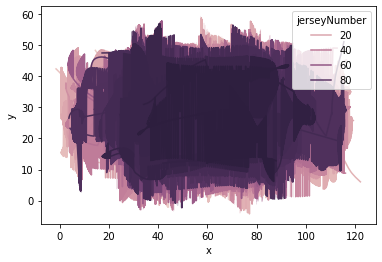

In [63]:
sns.lineplot(data=play,x='x',y='y',hue='jerseyNumber')

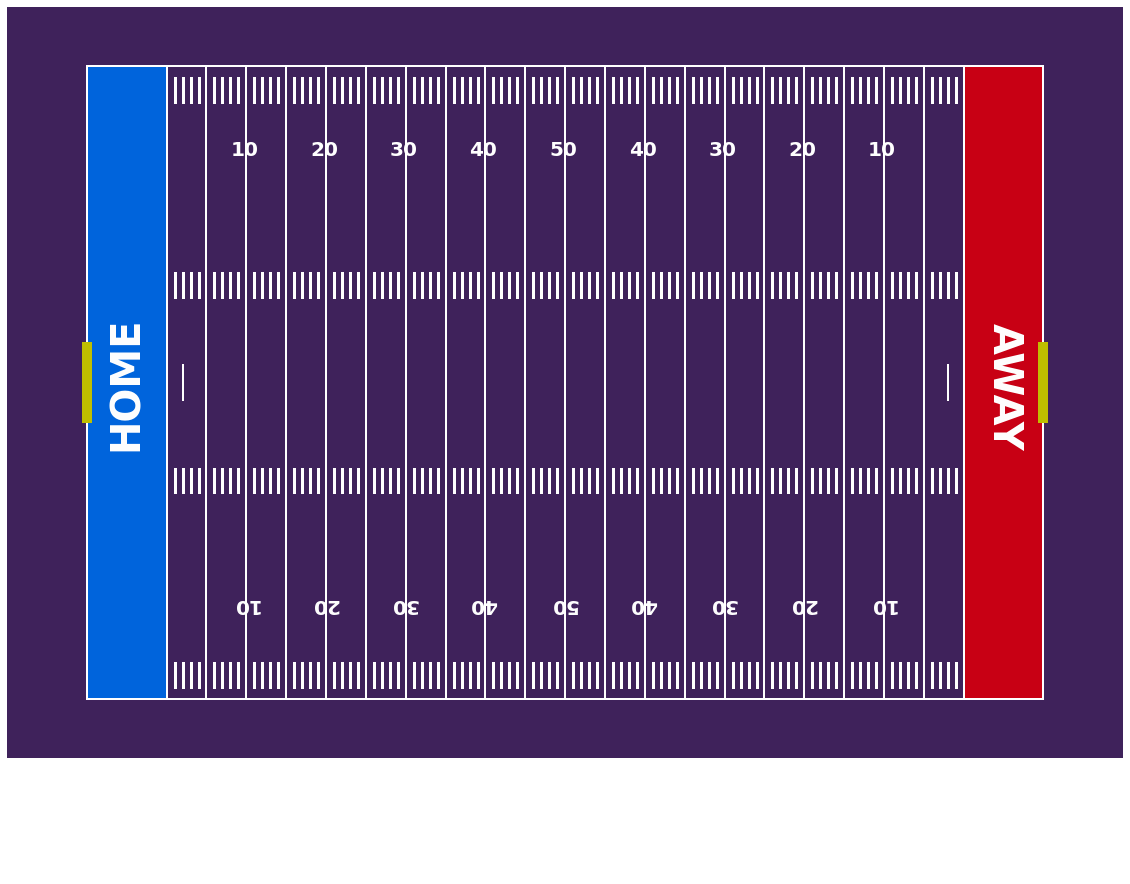

In [80]:
import matplotlib.patches as patches
from matplotlib.patches import Arc
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

# Change size of the figure
plt.rcParams['figure.figsize'] = [20, 16]
def drawPitch(width, height, color="w"):
    fig = plt.figure()
    ax = plt.axes(xlim=(-10, width + 30), ylim=(-15, height + 5))
    plt.axis('off')

    # Grass around pitch
    rect = patches.Rectangle((-10, -5), width + 40, height + 10, linewidth=1, facecolor='#3f225b', capstyle='round')
    ax.add_patch(rect)
    ###################

    # Pitch boundaries
    rect = plt.Rectangle((0, 0), width + 20, height, ec=color, fc="None", lw=2)
    ax.add_patch(rect)
    ###################

    # vertical lines - every 5 yards
    for i in range(21):
        plt.plot([10 + 5 * i, 10 + 5 * i], [0, height], c="w", lw=2)
    ###################
        
    # distance markers - every 10 yards
    for yards in range(10, width, 10):
        yards_text = yards if yards <= width / 2 else width - yards
        # top markers
        plt.text(10 + yards - 2, height - 7.5, yards_text, size=20, c="w", weight="bold")
        # botoom markers
        plt.text(10 + yards - 2, 7.5, yards_text, size=20, c="w", weight="bold", rotation=180)
    ###################

    # yards markers - every yard
    # bottom markers
    for x in range(20):
        for j in range(1, 5):
            plt.plot([10 + x * 5 + j, 10 + x * 5 + j], [1, 3], color="w", lw=3)

    # top markers
    for x in range(20):
        for j in range(1, 5):
            plt.plot([10 + x * 5 + j, 10 + x * 5 + j], [height - 1, height - 3], color="w", lw=3)

    # middle bottom markers
    y = (height - 18.5) / 2
    for x in range(20):
        for j in range(1, 5):
            plt.plot([10 + x * 5 + j, 10 + x * 5 + j], [y, y + 2], color="w", lw=3)

    # middle top markers
    for x in range(20):
        for j in range(1, 5):
            plt.plot([10 + x * 5 + j, 10 + x * 5 + j], [height - y, height - y - 2], color="w", lw=3)
    ###################

    # draw home end zone
    plt.text(2.5, (height - 10) / 2, "HOME", size=40, c="w", weight="bold", rotation=90)
    rect = plt.Rectangle((0, 0), 10, height, ec=color, fc="#0064dc", lw=2)
    ax.add_patch(rect)

    # draw away end zone    
    plt.text(112.5, (height - 10) / 2, "AWAY", size=40, c="w", weight="bold", rotation=-90)
    rect = plt.Rectangle((width + 10, 0), 10, height, ec=color, fc="#c80014", lw=2)
    ax.add_patch(rect)
    ###################
    
    # draw extra spot point
    # left
    y = (height - 3) / 2
    plt.plot([10 + 2, 10 + 2], [y, y + 3], c="w", lw=2)
    
    # right
    plt.plot([width + 10 - 2, width + 10 - 2], [y, y + 3], c="w", lw=2)
    ###################
    
    # draw goalpost
    goal_width = 6 # yards
    y = (height - goal_width) / 2
    # left
    plt.plot([0, 0], [y, y + goal_width], "-", c="y", lw=10, ms=20)
    # right
    plt.plot([width + 20, width + 20], [y, y + goal_width], "-", c="y", lw=10, ms=20)
    
    return fig, ax

fig, ax = drawPitch(100, 53.3)


In [81]:
def extract_one_game(game_id, play_id,df):
    game = df[(df.gameId == game_id) & (df.playId == play_id)]
    home = {}
    away = {}
    balls = []
    
    players = game.sort_values(['frameId'], ascending=True).groupby('nflId')
    for id, dx in players:
        jerseyNumber = int(dx.jerseyNumber.iloc[0])
        if dx.team.iloc[0] == "home":
            home[jerseyNumber] = list(zip(dx.x.tolist(), dx.y.tolist()))
        elif dx.team.iloc[0] == "away":
            away[jerseyNumber] = list(zip(dx.x.tolist(), dx.y.tolist()))


    ball_df = game.sort_values(['frameId'], ascending=True) 
    ball_df = ball_df[ball_df.team == "football"]
    balls = list(zip(ball_df.x.tolist(), ball_df.y.tolist()))
    return home, away, balls

In [82]:
from matplotlib import animation
from IPython.display import HTML
def animate_one_play(game_id, play_id,df):
    fig, ax = drawPitch(100, 53.3)
    
    home, away, balls = extract_one_game(game_id, play_id,df)

    team_left, = ax.plot([], [], 'o', markersize=20, markerfacecolor="r", markeredgewidth=2, markeredgecolor="white", zorder=7)
    team_right, = ax.plot([], [], 'o', markersize=20, markerfacecolor="b", markeredgewidth=2, markeredgecolor="white", zorder=7)
    ball, = ax.plot([], [], 'o', markersize=10, markerfacecolor="black", markeredgewidth=2, markeredgecolor="white", zorder=7)
    drawings = [team_left, team_right, ball]

    def init():
        team_left.set_data([], [])
        team_right.set_data([], [])
        ball.set_data([], [])
        return drawings

    def draw_teams(i):
        X = []
        Y = []
        for k, v in home.items():
            x, y = v[i]
            X.append(x)
            Y.append(y)
        team_left.set_data(X, Y)
        
        X = []
        Y = []
        for k, v in away.items():
            x, y = v[i]
            X.append(x)
            Y.append(y)
        team_right.set_data(X, Y)

    def animate(i):
        draw_teams(i)
        
        x, y = balls[i]
        ball.set_data([x, y])
        return drawings
    
    # !May take a while!
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(balls), interval=100, blit=True)

    return HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

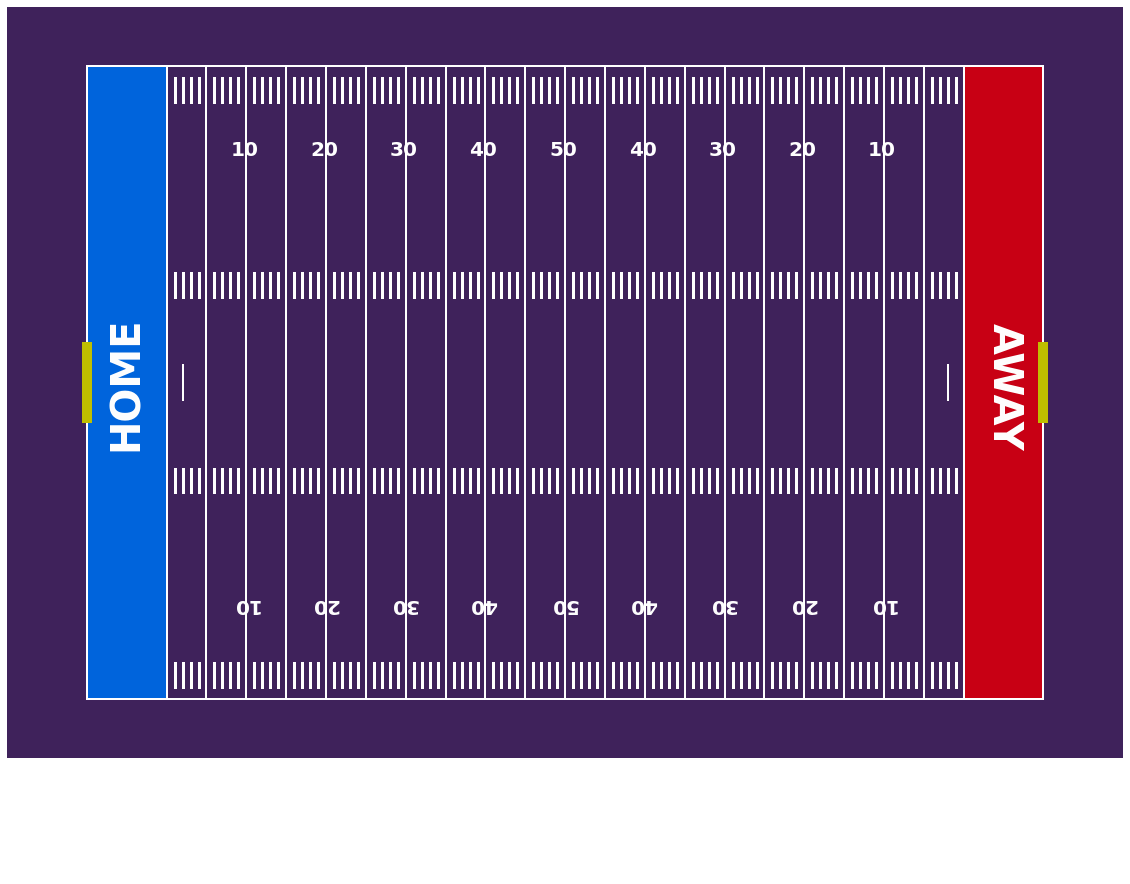

In [83]:
animate_one_play(2018123000, 36,tracking2018)


In [77]:
#!pip install ffmpeg-python
